<a href="https://colab.research.google.com/github/Ayanlola2002/Datalit/blob/master/DataLit_regressor_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#installing quandl to extract Disney stock price data from quandl websites
!pip3 install quandl

  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


The above unix code line was used to install the quandl modules to download stock data prices from  
*https://www.quandl.com/data/EOD/DIS-The-Walt-Disney-Company-DIS-Stock-Prices-Dividends-and-Splits*

Remember to write a unix command on colab such as pip command
you need to add the exclamation mark(!).at the beggining of the unix command 

In [0]:
#Importing Neccessary Libraries for Linear regression task
import numpy as np #Necessary for reshaping of dates and prices 
import matplotlib.pyplot as plt#Neccessary for for plotting graphs
from matplotlib import style#Neccesary for applying ggplot style
from sklearn.linear_model import LinearRegression #used for creating the linear regressor object
from sklearn.model_selection import train_test_split #used to slit dataset into train and test sets
import quandl# neccessary to download stock price dataset 
import datetime # to handle dates


The above modules are neccessary modules needed for linear regression



*  import numpy as np #Necessary for reshaping of dates and prices 

*  import matplotlib.pyplot as plt#Neccessary for for plotting graphs

*  from matplotlib import style#Neccesary for applying ggplot style

*  from sklearn.linear_model import LinearRegression #used for 
creating the linear regressor object

*  from sklearn.model_selection import train_test_split #used to slit dataset into train and test sets

* import quandl# neccessary to download stock price dataset 

*import datetime # to handle dates





In [0]:
style.use('ggplot')

#Defining start date and end date of data to be downloaded from the quandl stock websites 
# we collected stock data from a period 3Rd of march 2018 to current date
start_date = datetime.date(2018,1,3)
end_date = datetime.date.today()

quandl.ApiConfig.api_key = "J9x3-inkAqy-tn77em4f"

#Get Data From Quandl
df = quandl.get('EOD/DIS', start_date=start_date, end_date=end_date, collapse="daily")
df = df.reset_index()
prices = df['Close'].tolist()
dates = df.index.tolist()

#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

This above section downloaded the stock data from the quandl websites.The data collected was from 3rd march 2018 to current date
The 'start_date' & 'end_date'  varriable were used to hold the value of the dates.

To access data from quandl websites 
"quandl.ApiConfig.api_key" was used to hold the value of the api key to access the stock data from quandl websites.this is gotten from the quandl websites.(to get more info  about quandl read the following links:

1.   https://blog.quandl.com/getting-started-with-the-quandl-api
2.   https://www.quandl.com/tools/python

3.https://medium.com/python-data/quandl-getting-end-of-day-stock-data-with-python-8652671d6661



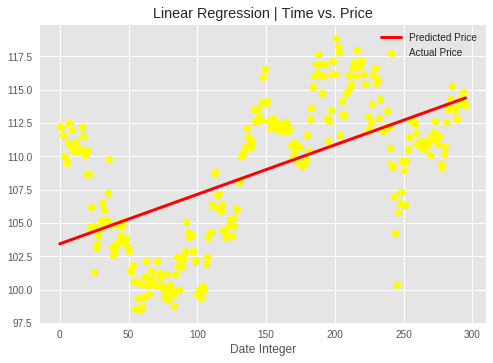

103.8021107548226 0.03710037387156032 103.431107016107


In [0]:
#Define Linear Regressor Object
regressor = LinearRegression()
regressor.fit(dates, prices)

#Visualize Results
plt.scatter(dates, prices, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, regressor.predict(dates), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Predict Price on Given Date
date = [[10]]
predicted_price =regressor.predict(date)
print(predicted_price[0][0],regressor.coef_[0][0] ,regressor.intercept_[0])

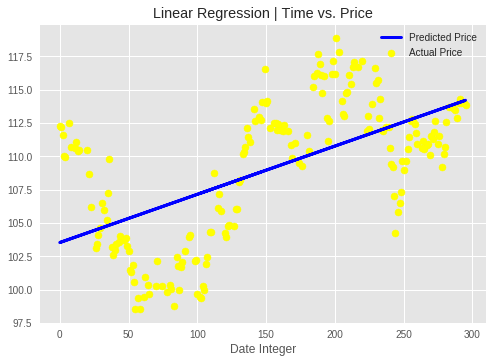

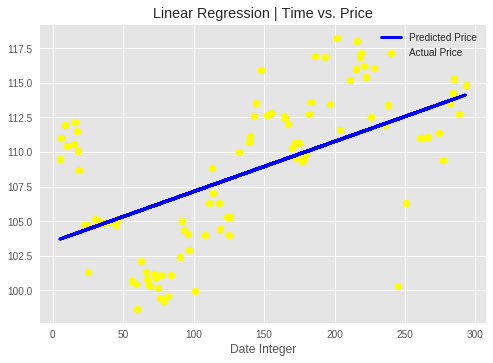

In [0]:
#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.33, random_state=42)
regressor.fit(xtrain, ytrain)

#Train Set Graph
plt.scatter(xtrain, ytrain, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Test Set Graph
plt.scatter(xtest, ytest, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()